In [1]:
# Description : What is ICHIMOKU TRADING? how it Work? And Implement it using Python?

In [2]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

import plotly.graph_objects as go

In [3]:
# Get the Stock Symbol for the Portfolio 
# FAANG
stockSymbols = ['SBIN.NS']

# GET the stock starting date
stockDate = '2019-01-01'

stock_End_date = '2020-06-30'

In [4]:
# Create a function to get the stock prices in the portfolio
def getMyPortfolio(stocks = stockSymbols, start = stockDate, end=stock_End_date):
  data = web.DataReader(stocks, data_source='yahoo', start=start, end=end, )
  data.columns = ['AdjClose', 'Close', 'High', 'Low', 'Open', 'Volume']
  return data

In [5]:
# Get the stock portfolio Adj. Close price
my_stocks = getMyPortfolio(stockSymbols)
my_stocks

,AdjClose,Close,High,Low,Open,Volume
Date,,,,,,
2019-01-01,299.600006,299.600006,300.700012,293.850006,297.500000,11837127.0
2019-01-02,293.899994,293.899994,302.500000,293.100006,299.100006,25559853.0
2019-01-03,291.100006,291.100006,295.549988,290.100006,295.000000,17548347.0
2019-01-04,297.649994,297.649994,299.000000,291.500000,292.100006,19514041.0
2019-01-07,296.299988,296.299988,301.500000,295.200012,301.049988,14579399.0
...,...,...,...,...,...,...
2020-06-25,185.250000,185.250000,186.800003,180.399994,182.199997,73620385.0
2020-06-26,184.600006,184.600006,188.600006,183.800003,188.000000,49176958.0
2020-06-29,179.250000,179.250000,183.100006,178.500000,183.000000,50966428.0


# **ICHIMOKU TRADING Formula And Implement using Python

## Kijun-sen
- The Mathematical form of Kijun-sen is in form with period as 9:
###                            **Kijun-sen** = Highest_High + Lowest_Low / 2

In [6]:
# Calculate Kijun-sen, period as 26
n = 26

# Calculate Highest-high of stock with 26 period by selecting High value from stock.
Highest_high = my_stocks['High'].rolling(window=n).max()

# Calculate Lowest-Low of stock with 26 period by selecting min value from stock.
Lowest_low = my_stocks['Low'].rolling(window=n).min()

# Calculate Kijun-sen
my_stocks['Kijun_sen'] = (Highest_high + Lowest_low)/2

# Tenkan-sen
- The Mathematical form of Kijun-sen is in form with period as 9:
#                              Tenkan_sen = Highest_High + Lowest_Low / 2

In [7]:
# Calculate Tenkan-senperiod as 9
n = 9

# Calculate Highest-high of stock with period by selecting High value from Stock.
nine_period_low = my_stocks['High'].rolling(window=9).max()

# Calculate Lowest-low of stock with period by selecting Low value from stock.
nine_period_high = my_stocks['Low'].rolling(window=9).min()

# Calculate Tenkan-sen.
my_stocks['Tenkan-sen'] = (nine_period_low + nine_period_high) / 2

## Senkou Span A (Leading Span A):
- ### Senkou Span A(Leading Span A) = **Tenkan-sen** + **Kijun-sen** / *2*

In [8]:
# Calculate the Senkou Span A(Leading Span A) with period of 26
n = 26

my_stocks['Senkou_Span_A'] = ((my_stocks['Tenkan-sen'] + my_stocks['Kijun_sen']) / 2).shift(n)

## Senkou Span B (Leading Span B) with period as 52:
- ### *Senkou Span B* = **Highest High** *+* **Lowest Low** / *2*


In [9]:
# Calculate Senkou Span B (Leading Span B) with period of 52
n = 52

# Calculate Highest-high of stock with period by selecting High value from Stock with period of 52.
period52_high = my_stocks['High'].rolling(window=52).max()

# Calculate Lowest-low of stock with period by selecting Low value from stock with period of 52.
period52_low = my_stocks['Low'].rolling(window=52).min()

# Calculate the senkou_span_b
my_stocks['senkou_span_b'] = ((period52_high + period52_low) / 2).shift(26)

In [10]:
# The most current closing price plotted 26 time periods behind (optional)
my_stocks['chikou_span'] = my_stocks['Close'].shift(-26)

In [11]:
my_stocks = my_stocks.drop(['Volume'], axis=1)

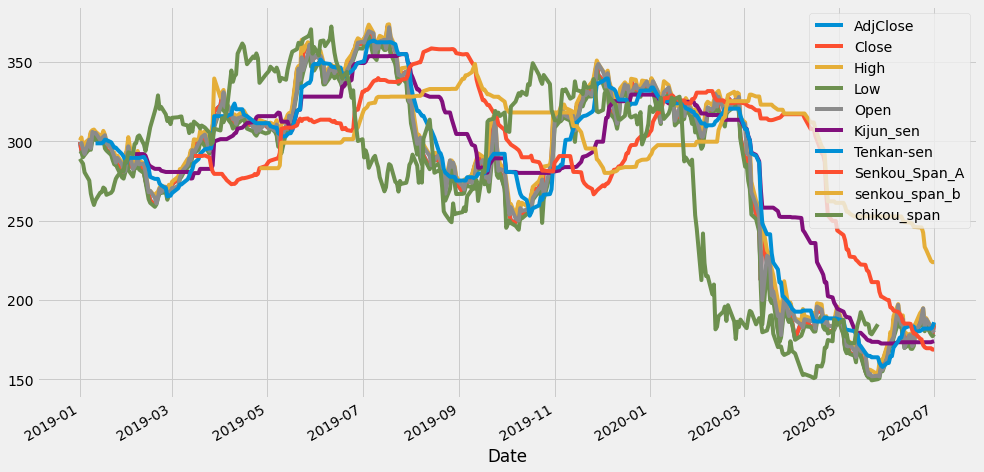

In [12]:
my_stocks.plot(figsize=(15, 8))
plt.show()

In [13]:
my_stocks.columns

Index(['AdjClose', 'Close', 'High', 'Low', 'Open', 'Kijun_sen', 'Tenkan-sen',
       'Senkou_Span_A', 'senkou_span_b', 'chikou_span'],
      dtype='object')

In [14]:
# declare a figure
fig=go.Figure()

fig.add_trace(go.Scatter(x=my_stocks.index, y= my_stocks['Kijun_sen'], line=dict(width=1.5, color = 'red'), name = 'Slow %K'))
fig.add_trace(go.Scatter(x=my_stocks.index, y=my_stocks['Tenkan-sen'], line=dict(width=1.5, color = 'red'), name = 'Slow %D'))
fig.add_trace(go.Scatter(x=my_stocks.index, y= my_stocks['Senkou_Span_A'], line=dict(width=1.5, color = 'blue'), name = 'Slow %D'))
fig.add_trace(go.Scatter(x=my_stocks.index, y= my_stocks['senkou_span_b'], line=dict(width=1.5, color = 'blue'), name = 'Slow %D'))
fig.add_trace(go.Scatter(x=my_stocks.index, y= my_stocks['chikou_span'], line=dict(width=1.5, color = 'green'), name = 'Slow %D'))

fig.add_trace(go.Candlestick(x=my_stocks.index, open=my_stocks['Open'], high=my_stocks['High'], low=my_stocks['Low'], close=my_stocks['Close'], name = 'Market Data'))

"""fig.update_layout(shapes=(list([dict(type= 'line', yref= 'y', y0= my_stocks['Kijun_sen'], y1= my_stocks['Kijun_sen'], xref= 'paper', x0= 0, x1= 1),
                          dict(type= 'line', yref= 'y', y0= my_stocks['Tenkan-sen'], y1= my_stocks['Tenkan-sen'], xref= 'paper', x0= 0, x1= 1),
                          dict(type= 'line', yref= 'y', y0= my_stocks['Senkou_Span_A'], y1= my_stocks['Senkou_Span_A'], xref= 'paper', x0= 0, x1= 1),
                          dict(type= 'line', yref= 'y', y0= my_stocks['senkou_span_b'], y1= my_stocks['senkou_span_b'], xref= 'paper', x0= 0, x1= 1),
                          dict(type= 'line', yref= 'y', y0= my_stocks['chikou_span'], y1= my_stocks['chikou_span'], xref= 'paper', x0= 0, x1= 1)])))
"""
fig.show()